In [43]:
#Read data from file txt and set default columns
import pandas as pd
datafile = "facebook_combined.txt"
data = pd.read_csv(datafile, sep = " ",  names = ['OriginNodeId', 'LinkedNodeID'])

#Get 100 node at a head
nodes = data["OriginNodeId"].unique()[:100]
# filter edges which has at least a node from list
data = data[(data["OriginNodeId"].isin(nodes)) & (data["LinkedNodeID"].isin(nodes))]
data

,OriginNodeId,LinkedNodeID
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
1475,92,101
1494,94,101
1522,98,103
1523,98,104


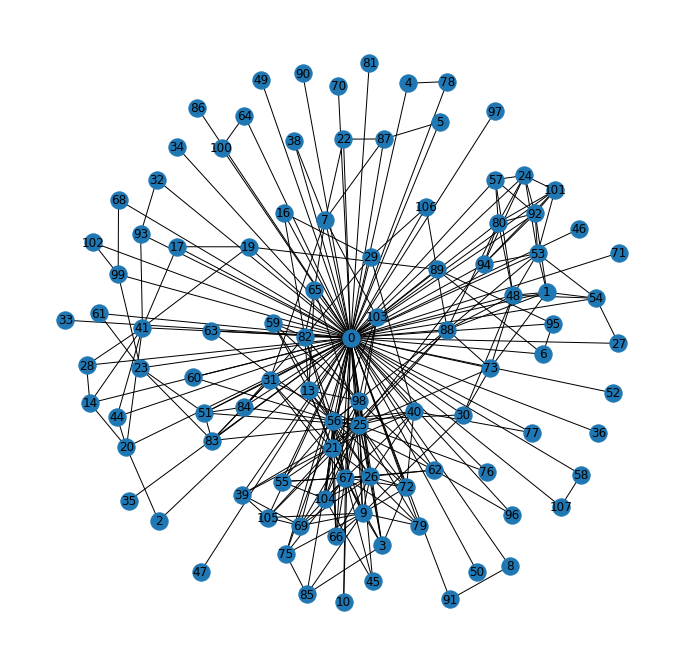

In [45]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
for _, row in data.iterrows():
    G.add_edge(row["OriginNodeId"], row["LinkedNodeID"])
fig, ax = plt.subplots(figsize=(12,12))
nx.draw(G, with_labels = True, ax = ax)
plt.show()

In [47]:
import numpy as np
degrees = [d for _, d in G.degree()]
#Muc do phan tan cua do thi 
mean_degree = np.mean(degrees)
#Do lech chuan
std_degree = np.std(degrees)
print(f"Mean Degree: {mean_degree:.2f}")
print(f"Standard deviation of degree: {std_degree:.2f}")
###
# Trung binh moi node trong do thi co khoang 6 canh ket noi den cac node khac. Va do lech chuan cua do bac cac node trong do thi la 10.40

Mean Degree: 6.02
Standard deviation of degree: 10.40


In [16]:
#Degree
pos = nx.spring_layout(G1)
degCent = nx.degree_centrality(G1)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in degCent.values()]
plt.figure(figsize=(15,15))
nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

sorted(degCent, key=degCent.get, reverse=True)[:5]


NameError: name 'G1' is not defined

[107, 58, 428, 563, 1684]

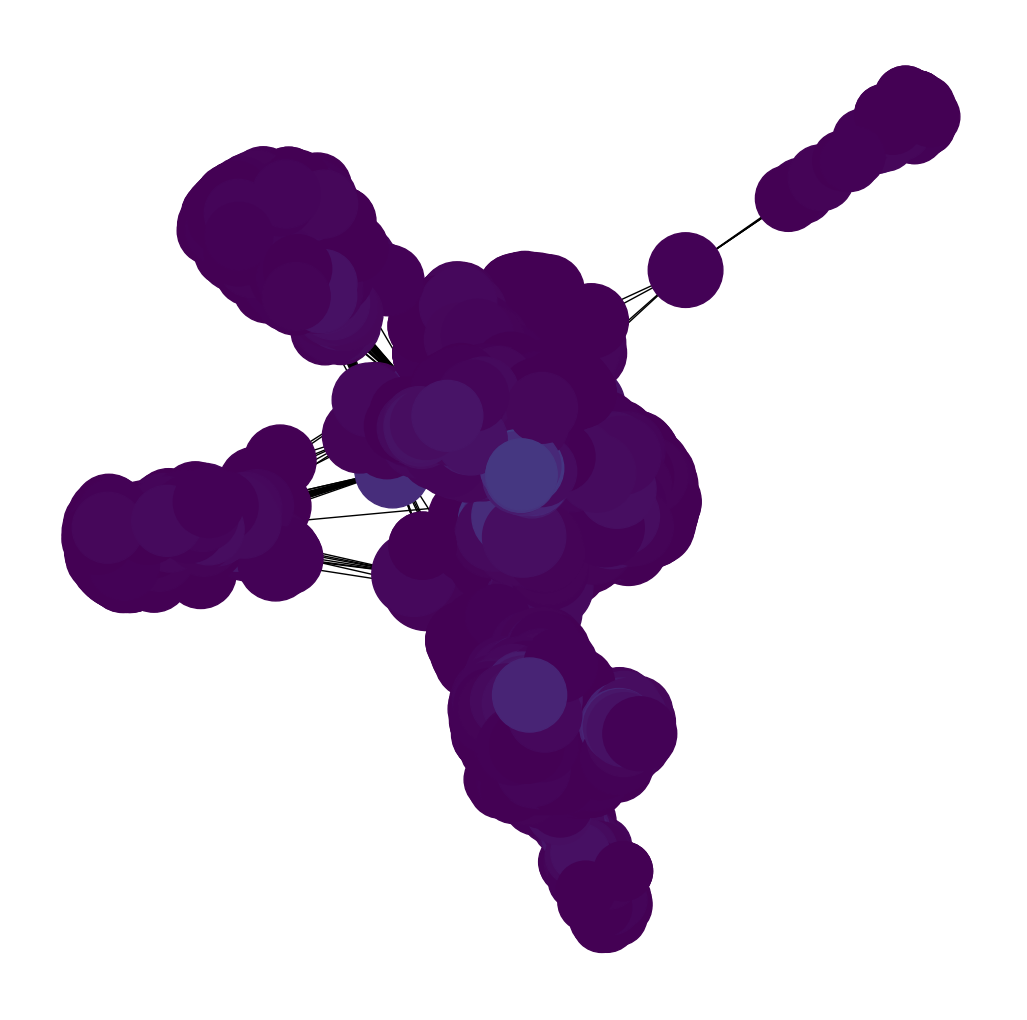

In [7]:
#Closeness
pos = nx.spring_layout(G1)
cloCent = nx.closeness_centrality(G1)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in cloCent.values()]
plt.figure(figsize=(13,13))
nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
sorted(cloCent, key=cloCent.get, reverse=True)[:5]

In [11]:
#Eeigenvector
datafile = "facebook_combined.txt"
G = nx.read_edgelist(datafile)
nodes = list(G.nodes)[:100]
G_sub = G.subgraph(nodes)
edges = list(G_sub.edges)
print("nodes")
print(nodes)
print("edges")
print(edges)

nodes
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
edges
[('30', '0'), ('30', '9'), ('30', '48'), ('30', '56'), ('30', '73'), ('82', '0'), ('82', '13'), ('82', '16'), ('82', '29'), ('82', '56'), ('82', '59'), ('82', '65'), ('82', '67'), ('82', '84'), ('82', '98'), ('63', '0'), ('63', '56'), ('20', '0'), ('20', '2'), ('20', '14'), ('20', '41'), ('20', '44'), ('69', '0'), ('69', '9'), ('69', '25'), ('69', '26'), ('69', '39'), ('69', '67'), ('67', '0'),

In [17]:
betCent = nx.betweenness_centrality(G_sub, normalized=True, endpoints=True)
print("Gia tri betweenness centrality của các nodes")
for node, value in betCent.items(): 
    print(node,value)

Gia tri betweenness centrality của các nodes
30 0.020286195286195286
82 0.02206060606060606
63 0.02
20 0.020370370370370372
69 0.020151515151515153
67 0.02902934102934103
35 0.02
42 0.02
18 0.02
55 0.02
60 0.02
61 0.02
50 0.02
7 0.020875420875420877
91 0.02
24 0.020134680134680134
36 0.02
46 0.02
6 0.02
48 0.021329966329966327
43 0.02
23 0.020505050505050505
59 0.02
5 0.02
47 0.02
12 0.02
11 0.02
58 0.02
19 0.0202020202020202
28 0.02
4 0.02
15 0.02
13 0.020575757575757574
87 0.0202020202020202
76 0.02
75 0.02011784511784512
51 0.020202020202020204
8 0.02
94 0.02037037037037037
72 0.020102934102934105
73 0.0203030303030303
65 0.02033189033189033
86 0.02
16 0.02
27 0.02
39 0.020033670033670035
10 0.02
33 0.02
62 0.020404040404040404
22 0.02
98 0.020591149591149594
90 0.02
57 0.02009090909090909
54 0.020303030303030302
93 0.020101010101010102
31 0.02095959595959596
56 0.028884559884559877
52 0.02
14 0.020067340067340067
3 0.020252525252525255
40 0.021274651274651273
25 0.03346512746512746

In [1]:
#Betweenness
pos = nx.spring_layout(G_sub)
node_color = [20000.0 * G_sub.degree(v) for v in G_sub]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(12,12))
nx.draw_networkx(G_sub, pos=pos, with_labels=True)
plt.axis('off')
sorted(betCent, key=betCent.get, reverse=True)[:5]

NameError: name 'nx' is not defined

In [ ]:
s